# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

In [3]:
# Setup the DataFrame that will be used for collecting data from API
myCities_df = pd.DataFrame({"City": cities})
myCities_df["Cloudiness"] = ""
myCities_df["Country"] = ""
myCities_df["Date"] = ""
myCities_df["Humidity"] = ""
myCities_df["Lat"] = ""
myCities_df["Lng"] = ""
myCities_df["Max Temp"] = ""
myCities_df["Wind Speed"] = ""

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Variables to get proper URL and Sets in our loop
basic_url = "https://api.openweathermap.org/data/2.5/weather?q="
counter = 0
set_Counter = 1

# Printing the beginning portion of out output
print("Beginning Data Retrieval ")
print("-----------------------------")

# Our main loop to allow data collection from the API through each city gathered previously
for index, row in myCities_df.iterrows():
    
    # Variable for city to use everytime we go to API
    temp_city = myCities_df.iloc[index,0]
    
    # Our final URL for each API call
    url = basic_url + temp_city + "&appid=" + api_key
    
    # Setting json Variable to the API
    data = requests.get(url).json()
    
    # Helps us collect the sets for the output
    counter += 1
    if counter == 50:
        counter = 0
        set_Counter += 1
        
    # Try and Except allow us to check if city is there and collect data for it
    # If city is not found then we output a message
    try:
        print("Processing Record " + str(counter) + " | of Set " + str(set_Counter) + " | " + data["name"])
        myCities_df.loc[index, 'City'] = data["name"]
        myCities_df.loc[index, 'Cloudiness'] = data['clouds']["all"]
        myCities_df.loc[index, 'Country'] = data["sys"]['country']
        myCities_df.loc[index, 'Date'] = data['dt']
        myCities_df.loc[index, 'Humidity'] = data['main']["humidity"]
        myCities_df.loc[index, 'Lat'] = data['coord']["lat"]
        myCities_df.loc[index, 'Lng'] = data['coord']["lon"]
        myCities_df.loc[index, 'Max Temp'] = data['main']["temp_max"]
        myCities_df.loc[index, 'Wind Speed'] = data['wind']["speed"]
    except:
        print("City not found. Skipping...")
    # End of loop
        
# Printing the end portion of out output
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 | of Set 1 | Bambous Virieux
Processing Record 2 | of Set 1 | Avarua
Processing Record 3 | of Set 1 | Fare
Processing Record 4 | of Set 1 | Ushuaia
Processing Record 5 | of Set 1 | Esperance
Processing Record 6 | of Set 1 | New Norfolk
Processing Record 7 | of Set 1 | Hilo
Processing Record 8 | of Set 1 | Bluff
Processing Record 9 | of Set 1 | Albany
Processing Record 10 | of Set 1 | Jamestown
Processing Record 11 | of Set 1 | Hit
Processing Record 12 | of Set 1 | Pathein
Processing Record 13 | of Set 1 | Baker City
Processing Record 14 | of Set 1 | Grong
Processing Record 15 | of Set 1 | Ranot
Processing Record 16 | of Set 1 | Beloha
Processing Record 17 | of Set 1 | Mataura
Processing Record 18 | of Set 1 | Ahipara
Processing Record 19 | of Set 1 | Port Alfred
Processing Record 20 | of Set 1 | Carnarvon
City not found. Skipping...
Processing Record 22 | of Set 1 | Cherskiy
Processing Record 23 | of Set 1 | Br

Processing Record 47 | of Set 4 | Abha
Processing Record 48 | of Set 4 | Petauke
Processing Record 49 | of Set 4 | Pangoa
Processing Record 0 | of Set 5 | Beringovskiy
Processing Record 1 | of Set 5 | Bairnsdale
Processing Record 2 | of Set 5 | Camacha
Processing Record 3 | of Set 5 | Cleburne
Processing Record 4 | of Set 5 | Seymchan
Processing Record 5 | of Set 5 | Lamu
Processing Record 6 | of Set 5 | Ajuchitlan
Processing Record 7 | of Set 5 | Preston
Processing Record 8 | of Set 5 | Sijunjung
Processing Record 9 | of Set 5 | Praia da Vitoria
Processing Record 10 | of Set 5 | Lorengau
Processing Record 11 | of Set 5 | Sozimskiy
Processing Record 12 | of Set 5 | Keetmanshoop
Processing Record 13 | of Set 5 | Lagos
City not found. Skipping...
Processing Record 15 | of Set 5 | Margate
Processing Record 16 | of Set 5 | Mount Isa
Processing Record 17 | of Set 5 | Lodja
Processing Record 18 | of Set 5 | Longyearbyen
Processing Record 19 | of Set 5 | Ardmore
Processing Record 20 | of Set 

Processing Record 42 | of Set 8 | Necochea
Processing Record 43 | of Set 8 | Vranov
Processing Record 44 | of Set 8 | Bedesa
Processing Record 45 | of Set 8 | Kalmunai
Processing Record 46 | of Set 8 | Sault Sainte Marie
Processing Record 47 | of Set 8 | Labuhan
Processing Record 48 | of Set 8 | Ca Mau
City not found. Skipping...
City not found. Skipping...
Processing Record 1 | of Set 9 | Martapura
City not found. Skipping...
Processing Record 3 | of Set 9 | Hambantota
Processing Record 4 | of Set 9 | Darhan
Processing Record 5 | of Set 9 | Port Lincoln
Processing Record 6 | of Set 9 | Seoul
Processing Record 7 | of Set 9 | Sibenik
Processing Record 8 | of Set 9 | Zalantun
Processing Record 9 | of Set 9 | Nantucket
City not found. Skipping...
Processing Record 11 | of Set 9 | Buckeye
Processing Record 12 | of Set 9 | Nurota
Processing Record 13 | of Set 9 | Palu
City not found. Skipping...
Processing Record 15 | of Set 9 | Ravar
City not found. Skipping...
Processing Record 17 | of Se

Processing Record 38 | of Set 12 | Elmadag
Processing Record 39 | of Set 12 | Pitimbu
Processing Record 40 | of Set 12 | Muros
Processing Record 41 | of Set 12 | Ranavav
Processing Record 42 | of Set 12 | Vanderhoof
Processing Record 43 | of Set 12 | Pochutla
Processing Record 44 | of Set 12 | Orlik
Processing Record 45 | of Set 12 | Rocha
Processing Record 46 | of Set 12 | Kikwit
Processing Record 47 | of Set 12 | Ulladulla
Processing Record 48 | of Set 12 | Kaseda
Processing Record 49 | of Set 12 | Terni
Processing Record 0 | of Set 13 | Dunedin
Processing Record 1 | of Set 13 | Freeport
City not found. Skipping...
Processing Record 3 | of Set 13 | Okhansk
City not found. Skipping...
Processing Record 5 | of Set 13 | Buriti Alegre
Processing Record 6 | of Set 13 | Valentin Gomez Farias
City not found. Skipping...
Processing Record 8 | of Set 13 | Woensdrecht
City not found. Skipping...
Processing Record 10 | of Set 13 | Pitsunda
Processing Record 11 | of Set 13 | Nizhniy Kuranakh
Pro

In [8]:
# Removing any rows that we couldn't collect data for.
myCities_df['Cloudiness'].replace('', np.nan, inplace=True)
myCities_df.dropna(subset=['Cloudiness'], inplace=True)

# Set the new clean data into a new df 
df = myCities_df.reset_index(drop=True)

# Converted Cloudiness to a clean Int format
df["Cloudiness"] = df["Cloudiness"].astype(int)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
df.to_csv("output_data/cities.csv")

df.count()

City          565
Cloudiness    565
Country       565
Date          565
Humidity      565
Lat           565
Lng           565
Max Temp      565
Wind Speed    565
dtype: int64

In [10]:
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bambous Virieux,75,MU,1551223742,83,-20.34,57.76,301.15,7.2
1,Avarua,0,CK,1551222000,66,-21.21,-159.78,302.15,7.2
2,Fare,8,PF,1551223802,98,-16.7,-151.02,302.506,2.9
3,Ushuaia,40,AR,1551222000,70,-54.81,-68.31,281.15,13.9
4,Esperance,20,TT,1551223507,78,10.24,-61.45,299.82,4.1


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

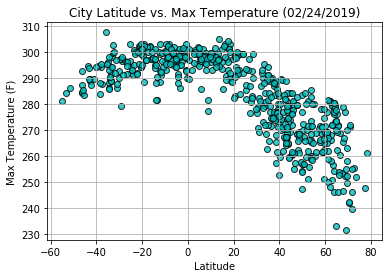

In [11]:
plt.scatter(df["Lat"], df["Max Temp"], marker = "o", color= "c", edgecolor= "black", alpha = .8)
plt.title("City Latitude vs. Max Temperature (02/24/2019)")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("Images/Latitude_MaxTemp_Comparison.png")
plt.show()

#### Latitude vs. Humidity Plot

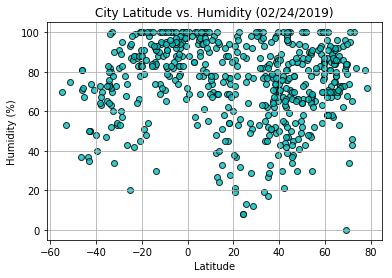

In [12]:
plt.scatter(df["Lat"], df["Humidity"], marker = "o", color= "c", edgecolor= "black", alpha = .8)
plt.title("City Latitude vs. Humidity (02/24/2019)")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Images/Latitude_Humidity_Comparison.png")
plt.show()

#### Latitude vs. Cloudiness Plot

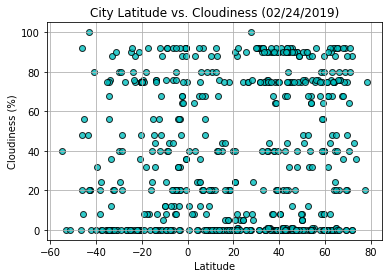

In [13]:
plt.scatter(df["Lat"], df["Cloudiness"], marker = "o", color= "c", edgecolor= "black", alpha = .8)
plt.title("City Latitude vs. Cloudiness (02/24/2019)")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Images/Latitude_Cloudiness_Comparison.png")
plt.show()

#### Latitude vs. Wind Speed Plot

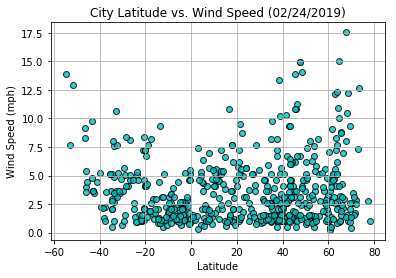

In [14]:
plt.scatter(df["Lat"], df["Wind Speed"], marker = "o", color= "c", edgecolor= "black", alpha = .8)
plt.title("City Latitude vs. Wind Speed (02/24/2019)")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Images/Latitude_WindSpeed_Comparison.png")
plt.show()